In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neural_network import MLPClassifier

In [30]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


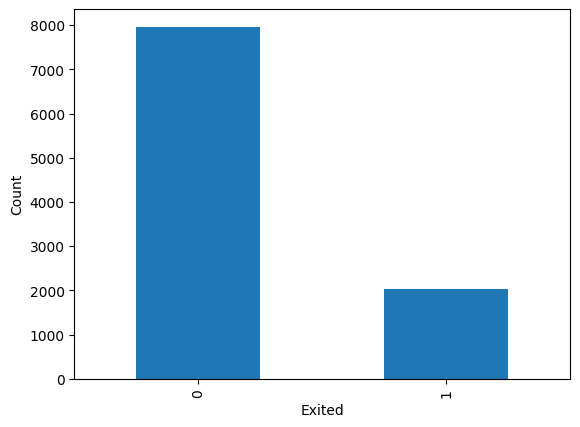

In [32]:
#lets first see how many left 
plt.xlabel('Exited')
plt.ylabel('Count')
df['Exited'].value_counts().plot.bar()
plt.show()

In [33]:
y=df['Exited']
X=df.drop(columns=['Exited'])

In [34]:
#convert all categoraical columns automatically
X=pd.get_dummies(X,drop_first=True)

In [35]:
#train-test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [36]:
#scale down the values to smaller ones so neural network classification becomes easier
scaler=StandardScaler()


In [37]:
X_train=scaler.fit_transform(X_train)


In [38]:
X_test=scaler.transform(X_test)

In [39]:
#make a simple MP :a small neural network
mlp=MLPClassifier(hidden_layer_sizes=(16,8),max_iter=20, verbose=True)

In [40]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 0.75432313
Iteration 2, loss = 0.50645217
Iteration 3, loss = 0.41446830
Iteration 4, loss = 0.36938980
Iteration 5, loss = 0.34252531
Iteration 6, loss = 0.32593456
Iteration 7, loss = 0.31255445
Iteration 8, loss = 0.30211757
Iteration 9, loss = 0.29448318
Iteration 10, loss = 0.28628706
Iteration 11, loss = 0.27914142
Iteration 12, loss = 0.27284965
Iteration 13, loss = 0.26690013
Iteration 14, loss = 0.25918331
Iteration 15, loss = 0.25275585
Iteration 16, loss = 0.24724983
Iteration 17, loss = 0.24072976
Iteration 18, loss = 0.23444197
Iteration 19, loss = 0.22752329
Iteration 20, loss = 0.22156439


C:\Users\arjun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=20, verbose=True)

In [41]:
y_pred=mlp.predict(X_test)

In [42]:
#SEE the calculations
print("Tets accuracy:",accuracy_score(y_test,y_pred))
print("Classification report:",classification_report(y_test,y_pred))
print("Confusion matrix:",confusion_matrix(y_test,y_pred))

Tets accuracy: 0.764
Classification report:               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1587
           1       0.41      0.32      0.36       413

    accuracy                           0.76      2000
   macro avg       0.62      0.60      0.61      2000
weighted avg       0.75      0.76      0.75      2000

Confusion matrix: [[1394  193]
 [ 279  134]]


In [43]:
#to see the prediction fo the first 10 values
print(y_pred[:10])

[0 0 0 0 0 0 1 1 0 0]
